## 4.18 查看连续型特征的取值 

> 前面我们已经对离散型特征的缺失值和异常值进行了排查和处理，接下来我们查看连续型特征：
首先可以借助max()查看连续型特征的最大值：


![](https://ai-studio-static-online.cdn.bcebos.com/b42099b8afb94255b7184a827cb6946ba2c9958fc77e4b3786eefab09f324c93)


## 实训任务

- 已给出所有连续型特征列名，保存在 continuous_columns中。
- 请借助min()函数查看数据各连续型特征的最小值。
- 将输出的连续型特征的最小值保存在变量data_con_min，类型为Series。


> 从结果来看，网上消费金额和公共事业缴费金额这两个字段的最小值均小于0，这里是否是异常值呢？我们还需要对这两个特征的取值进一步分析确认。 

In [3]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 所有连续型特征列名已保存在continuous_columns中
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age']
# 查看数据各连续型特征的最小值
#- 已给出所有连续型特征列名，保存在 continuous_columns中。
#- 请借助min()函数查看数据各连续型特征的最小值。
#- 将输出的连续型特征的最小值保存在变量data_con_min，类型为Series。

data_con_min = data[continuous_columns].min()
print(data_con_min)

age                               19.0
cashTotalAmt                       0.0
cashTotalCnt                       0.0
monthCardLargeAmt                  0.0
onlineTransAmt             -12676500.0
onlineTransCnt                     0.0
publicPayAmt                -6034950.0
publicPayCnt                       0.0
transTotalAmt                      0.0
transTotalCnt                      0.0
transCnt_non_null_months           0.0
transAmt_mean                      0.0
transAmt_non_null_months           0.0
cashCnt_mean                       0.0
cashCnt_non_null_months            0.0
cashAmt_mean                       0.0
cashAmt_non_null_months            0.0
card_age                           0.0
dtype: float64


## 4.19 网上消费金额异常值检测 

我们接下来对网上消费金额的异常值进行处理。

在前面的步骤中，我们发现网上消费金额的最小值小于0，可能存在异常情况。因此我们可以将网上消费金额与网上消费笔数进行对比分析。


## 实训任务

- 请从原始数据中筛选出网上消费金额小于0的数据
- 提取网上消费额小于0时网上消费金额onlineTransAmt和网上消费笔数onlineTransCnt这两列。
- 将结果赋予变量online_trans，类型为DataFrame。

发现网上消费金额小于0的客户达到了16360名，而且大部分的网上消费笔数不为0。因此我们可以初步得出判断：消费金额小于0可能是正常现象。这在实际业务中也是可以解释的：网上消费既可以有花销也可以有转入金额，例如退款或银行卡转账。
从结果中，我们还发现存在网上消费笔数为0的客户的网上消费金额不为0，这应该是异常值，需要进一步的分析。


In [4]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 从原始数据中筛选出网上消费金额小于0时，网上消费金额和网上消费笔数这两列
online_trans =  data[data['onlineTransAmt'] < 0][['onlineTransAmt', 'onlineTransCnt']]
print(online_trans)


       onlineTransAmt  onlineTransCnt
0             -7710.0             2.0
2           -164560.0            39.0
4             -5260.0            15.0
5              -170.0            12.0
8            -55270.0            73.0
...               ...             ...
47328       -154975.0            80.0
47329       -167115.0            79.0
47330       -244313.0            30.0
47332        -78832.0             6.0
47336       -175859.0            61.0

[16361 rows x 2 columns]


## 4.20 网上消费金额异常值处理

我们将网上消费笔数为0时，网上消费金额为负值的情况，进一步分析。

取出网上消费笔数为0，网上消费金额为负值的这两列，结果如下：

![](https://ai-studio-static-online.cdn.bcebos.com/0c34265c11464e8c99398b19cd139ed7f0e47cad86ea43238715511aaee67ad5)


可以看到网上消费笔数为0，部分网上消费金额为-0.000434、-0.000013等负数。这明显不符合业务逻辑，应该将这些网上消费金额均修正为0。

## 实训任务

- 请将网上消费笔数为0时的网上消费金额皆修改为0。
- 将修正后的网上消费笔数为0时，网上消费笔数与网上消费金额两列数据赋予变量online_after，类型为DataFrame。


In [5]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 将网上消费笔数为0时的网上消费金额皆修改为0
data.loc[data['onlineTransCnt'] == 0, 'onlineTransAmt'] = 0
# 查看修正后网上消费笔数为0时，网上消费金额与网上消费笔数
online_after = data[data["onlineTransCnt"]  == 0 ][["onlineTransAmt","onlineTransCnt"]] 
print(online_after)

       onlineTransAmt  onlineTransCnt
7                 0.0             0.0
12                0.0             0.0
14                0.0             0.0
16                0.0             0.0
17                0.0             0.0
...               ...             ...
47318             0.0             0.0
47324             0.0             0.0
47326             0.0             0.0
47334             0.0             0.0
47335             0.0             0.0

[14616 rows x 2 columns]


## 4.21 网上消费金额（onlineTransAmt）盒图绘制

初步对网上消费金额的异常值进行处理后，我们通过绘制盒图，查看网上消费金额的大致分布。

盒图会显示中位数，最大最小非异常值，上下四分位数以及异常点。


![](https://ai-studio-static-online.cdn.bcebos.com/f06f2546f75546cc87181970177ffc2ed34c5b723bdb418196ad5c0f2024d12f)


可以借助Seaborn中的boxplot()函数绘制盒图。

boxplot()函数语法为：boxplot(x=None,orient=None...)，其中
- x -- 数据集data中的列名。
- orient -- "v"|"h" 用于控制图形显示格式（水平|竖直）。


## 实训任务

- 调用Seaborn库中的boxplot()函数绘制盒图，查看网上消费金额数据分布。
- boxplot()函数的参数orient为v，表示竖向展示。
- 图形的尺寸参数figsize已设为(8,6)。
- 图形的其他参数保持默认值。

可以看到网上消费金额中有部分值特别大，大于2.0e+07（2000万），远高于其他客户消费金额，我们需要查看一下这部分客户的具体数据。


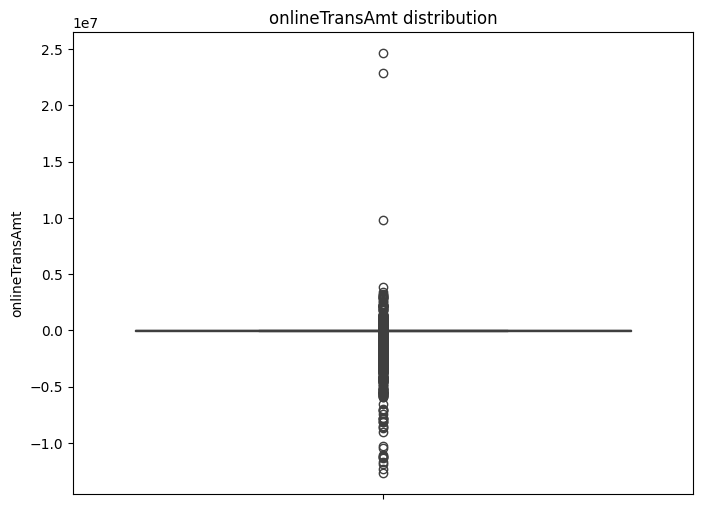

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
fig,ax = plt.subplots(figsize=(8,6))
# 绘制盒图查看网上消费金额数据分布
sns.boxplot(y='onlineTransAmt', data=data, orient='v', ax=ax)

plt.title('onlineTransAmt distribution')
plt.show()

## 4.22 网上消费金额（onlineTransAmt）异常值处理

我们通过绘制盒图，检测到了网上消费金额中有部分值特别大，大于2.0e+07，远高于其他客户消费金额。

通过data[data["onlineTransAmt"]>2.0e+07]筛选出这部分客户的数据，可以看到网上消费金额与笔数的数目为：


![](https://ai-studio-static-online.cdn.bcebos.com/89bd5963a4644b8aa08a0c3415ea2f58cbcc443a9926434e831c79d96fb5246f)

数据显示两个客户网上消费金额在2.0e+07（2千万）以上，远高于其他客户消费金额，同时网上消费笔数达到713和714笔，远高于其它客户消费笔数。

由此推断这两个可能是某机构客户，且由于和其它个人客户数据差别较大，我们选择将其删除。


## 实训任务

筛选出网上消费金额在2千万以下的数据样本，更新data。

In [7]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 筛选出网上消费金额在2千万以下的数据样本,更新data
data = data[data['onlineTransAmt'] < 2.0e+07]
print(data.head())

  CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市    0  38.0         2           0.0                        0   
1   一线城市    0  39.0        19           0.0                        0   
2   二线城市    0  40.0        16           0.0                        0   
3     其它    0  38.0        13       22000.0                        1   
4   二线城市    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  ...  \
0           0.0                        0             0             0  ...   
1           0.0                        0             0             0  ...   
2           0.0                        0             0             0  ...   
3           6.0                        1         22000             6  ...   
4           0.0                        0             0             0  ...   

  publicPayCnt sex  threeVerify  transAmt_mean  transAmt_non_null_months  \
0          0.0   女          

## 4.23 公共事业缴费金额（publicPayAmt）异常值检测

我们接下来对公共事业缴费金额的异常值进行处理：

公共事业缴费笔数publicPayCnt，公共事业缴费金额publicPayAmt是两个相关联的字段，我们重点分析这两个字段上的异常值。

查看公共事业缴费金额小于0的数据中，公共事业缴费笔数和公共事业缴费金额这两列。


## 实训任务

请从原始数据中筛选出公共事业缴费金额小于0时，公共事业缴费笔数和公共事业缴费金额这两列。将结果赋予变量public_pay，类型为DataFrame。

查看结果发现公共事业缴费金额存在负值，与之前的分析相同，这应该是正常的情况。源于银行卡的消费支出和存款转账等不同的业务方向。 公共事业缴费金额为负值时，大部分支出笔数不为0，这里出现部分公共事业缴费金额为负值，公共事业缴费笔数却为0的情况，需要进一步分析。

In [8]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 从原始数据中筛选出公共事业缴费金额小于0时，公共事业缴费笔数和公共事业缴费金额这两列
public_pay = data[data['publicPayAmt'] < 0][['publicPayCnt', 'publicPayAmt']]
print(public_pay)

       publicPayCnt   publicPayAmt
8              21.0 -187830.000000
45             50.0 -384200.000000
51              0.0      -0.000364
63              1.0     -90.000000
70              0.0      -0.000364
...             ...            ...
47319           1.0    -822.000000
47320           1.0     -40.000000
47321           7.0    -661.000000
47322           4.0   -1117.000000
47334           3.0    -550.000000

[4977 rows x 2 columns]


## 4.24 公共事业缴费金额（publicPayAmt）异常值处理

我们将公共事业缴费笔数为0，公共事业缴费金额为负值的情况，进一步分析。

取出公共事业缴费笔数为0，公共事业缴费金额为负值的这两列，结果如下：

![](https://ai-studio-static-online.cdn.bcebos.com/ff9c299f209f4230a89a9d8b2351c2631795c74816384bb39b1df6cec164c058)


可以看到公共事业缴费笔数为0，部分公共事业缴费金额均为-0.000364、-0.000241等负数，这明显不符合业务逻辑，应该将这些公共事业缴费金额均修正为0。

## 实训任务

请将公共事业缴费笔数为0时的公共事业缴费金额皆修改为0（直接在原始数据上进行修改）。

In [9]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 将公共事业缴费笔数为0时的公共事业缴费金额皆修改为0（直接在原始数据上进行修改）
data.loc[data['publicPayCnt'] == 0, 'publicPayAmt'] = 0
# 查看修正后的，公共事业缴费笔数为0时的公共事业缴费金额与公共事业缴费笔数
public_after = data[data["publicPayCnt"]  ==  0][["publicPayAmt","publicPayCnt"]]
print(public_after)

       publicPayAmt  publicPayCnt
0               0.0           0.0
1               0.0           0.0
3               0.0           0.0
7               0.0           0.0
12              0.0           0.0
...             ...           ...
47324           0.0           0.0
47325           0.0           0.0
47327           0.0           0.0
47331           0.0           0.0
47335           0.0           0.0

[17543 rows x 2 columns]


## 4.25 公共事业缴费金额（publicPayAmt）盒图绘制

初步对公共事业缴费金额的异常值进行处理后，我们通过绘制盒图的方式，查看公共事业缴费金额的数据大致分布。

## 实训任务

- 调用Seaborn库中的boxplot()函数绘制盒图，查看公共事业缴费金额数据分布。
- boxplot()函数的参数orient为"v"，表示竖向展示。
- 已设图形的尺寸参数figsize为(8,6)。
- 图形的其他参数保持默认值。


可以看到公共事业缴费金额中部分负值额度相对较大，其绝对值大于4.0e+06（400万），我们需要查看这些客户的具体数据。

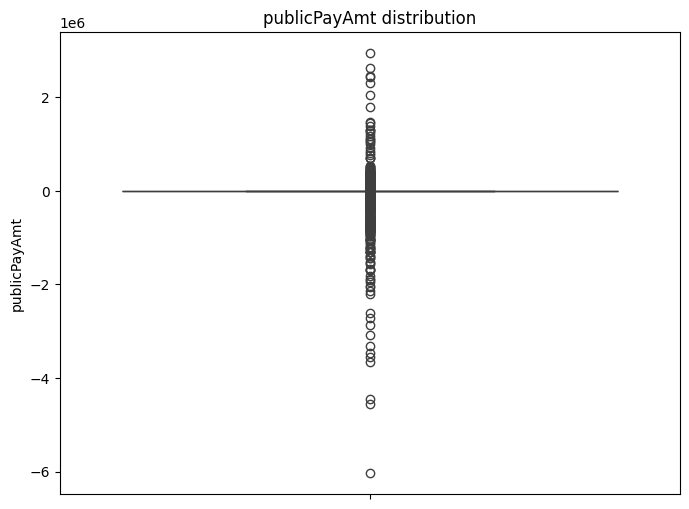

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_table('dataset.txt', encoding='gbk', sep=' ')

# 将公共事业缴费笔数为0时的公共事业缴费金额皆修改为0（直接在原始数据上进行修改）
data.loc[data['publicPayCnt'] == 0, 'publicPayAmt'] = 0

fig, ax = plt.subplots(figsize=(8, 6))

# 绘制盒图查看公共事业缴费金额数据分布
sns.boxplot(y='publicPayAmt', data=data, orient='v', ax=ax)

plt.title('publicPayAmt distribution')
plt.show()

## 4.26 公共事业缴费金额（publicPayAmt）异常值处理

我们通过绘制盒图，检测到了公共事业缴费金额中部分负值额度相对较大，其绝对值大于4.0e+06。

下面我们对这些离群值进行查看与处理：

## 实训任务

[](http://)请从原始数据中筛选出公共事业缴费金额小于-4.0e+06的样本数据，赋予变量public_pay，类型为DataFrame。

[](http://)数据显示公共事业缴费金额负值在4.0e+06（400万）以下时，其公共事业缴费笔数也相对为66～ 141笔不等。按照业务逻辑，每笔金额较大的情况也可能存在，于是这些值我们选择保留。

In [12]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ')
# 筛选出公共事业缴费金额小于-400万的样本数据
public_pay = data[data['publicPayAmt'] < -4.0e+06][['publicPayCnt', 'publicPayAmt']]
print(public_pay[['publicPayCnt','publicPayAmt']])

       publicPayCnt  publicPayAmt
397       66.000000 -4.546730e+06
770      141.000000 -6.034950e+06
29944    102.213675 -4.445474e+06
